### Dropout lerning regulation

![alt text](images/batch_norm.webp)

***Batch normalization*** (also known as batch norm) is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling. It was proposed by Sergey Ioffe and Christian Szegedy in 2015.[1]

The reasons behind the effectiveness of batch normalization remain under discussion. It was believed that it can mitigate the problem of internal covariate shift, where parameter initialization and changes in the distribution of the inputs of each layer affect the learning rate of the network.[1] Recently, some scholars have argued that batch normalization does not reduce internal covariate shift, but rather smooths the objective function, which in turn improves the performance.[2] However, at initialization, batch normalization in fact induces severe gradient explosion in deep networks, which is only alleviated by skip connections in residual networks.[3] Others maintain that batch normalization achieves length-direction decoupling, and thereby accelerates neural networks.[4]

In [1]:
import os
import sys
#pip loguru
from loguru import logger
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging (1)

In [2]:
logger.remove()  # Remove the default logger
logger.add(sys.stdout, level="INFO")  # Add a new logger that outputs to stderr

1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

Create initial data sets:
 * Load data
 * Normalization of predictors set (devide to 255 to set them between 0 and 1)
 * Notmalization of outputs (set it categorical)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
def model_fn(optimizer=None, batch_norm:bool = False):
  model =  Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(300, activation='relu'),
    Dense(10, activation='softmax')
  ]) if not batch_norm else Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(300, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
  ])
  if optimizer is None:
    model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  else:
    model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [6]:
def fit_model(model, x_train, y_train, epochs=5, batch_size=32, verbose=0, validation_data=None):
  '''Train the model with the given parameters.
  # Parameters:
  # - model: The model to be trained.
  # - x_train: The training data.
  # - y_train: The training labels.
  # - epochs: The number of epochs to train the model.
  # - batch_size: The size of the batches of data.
  # - verbose: Verbosity mode (0, 1, or 2).
  # - validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
  # Returns:
  # - history: A History object containing the training history.
  # '''
  logger.info("Training the model...")
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=validation_data)
  logger.info("Model training completed.")
  logger.debug(f"Model summary: {history.history}")
  return history

In [7]:
from sklearn.model_selection import train_test_split
def train_data_split_random(x_train, y_train, split_ratio=0.8):
    '''
    # Split the training data into training and validation sets by random sampling (Default 80% to 20%).
    # The split ratio determines the proportion of data used for training.
    '''
    x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=(1 - split_ratio), random_state=42)
    logger.info(f"Randomly split data into {len(x_train_split)} training samples and {len(x_val_split)} validation samples.")
    return x_train_split, x_val_split, y_train_split, y_val_split

Define train and validation set

In [8]:
x_train_set, x_val_set, y_train_set, y_val_set = train_data_split_random(x_train, y_train, 0.8)

2025-04-01 10:26:02.769 | INFO     | __main__:train_data_split_random:8 - Randomly split data into 48000 training samples and 12000 validation samples.


Define and train model without dropout

In [9]:

model = model_fn()
history = fit_model(model, x_train_set, y_train_set, epochs=5, verbose=0, validation_data=(x_val_set, y_val_set))

2025-04-01 10:26:02.825 | INFO     | __main__:fit_model:14 - Training the model...


C:\Users\ebliacher.CORPORATE\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2025-04-01 10:26:22.056 | INFO     | __main__:fit_model:16 - Model training completed.


Define and train model with dropout

In [11]:
model_batch_norm = model_fn(batch_norm=True)
history_batch_norm = fit_model(model_batch_norm, x_train_set, y_train_set, epochs=5, verbose=0, validation_data=(x_val_set, y_val_set))

2025-04-01 10:26:40.361 | INFO     | __main__:fit_model:14 - Training the model...


C:\Users\ebliacher.CORPORATE\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2025-04-01 10:27:04.229 | INFO     | __main__:fit_model:16 - Model training completed.


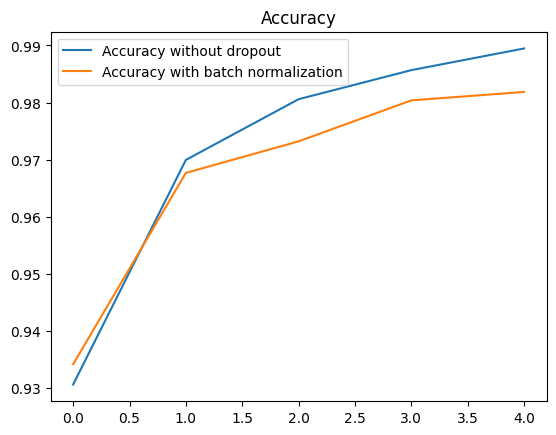

In [12]:
plt.plot(history.history['accuracy'], label='Accuracy without dropout')
plt.plot(history_batch_norm.history['accuracy'], label='Accuracy with batch normalization')
plt.title('Accuracy')
plt.legend()